In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('D:\\house\\house_data.csv')
print(df.head())
print(df.info())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [4]:
target_variable = df['price']
feature_variables = df.drop(['date', 'price'], axis = 1)

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

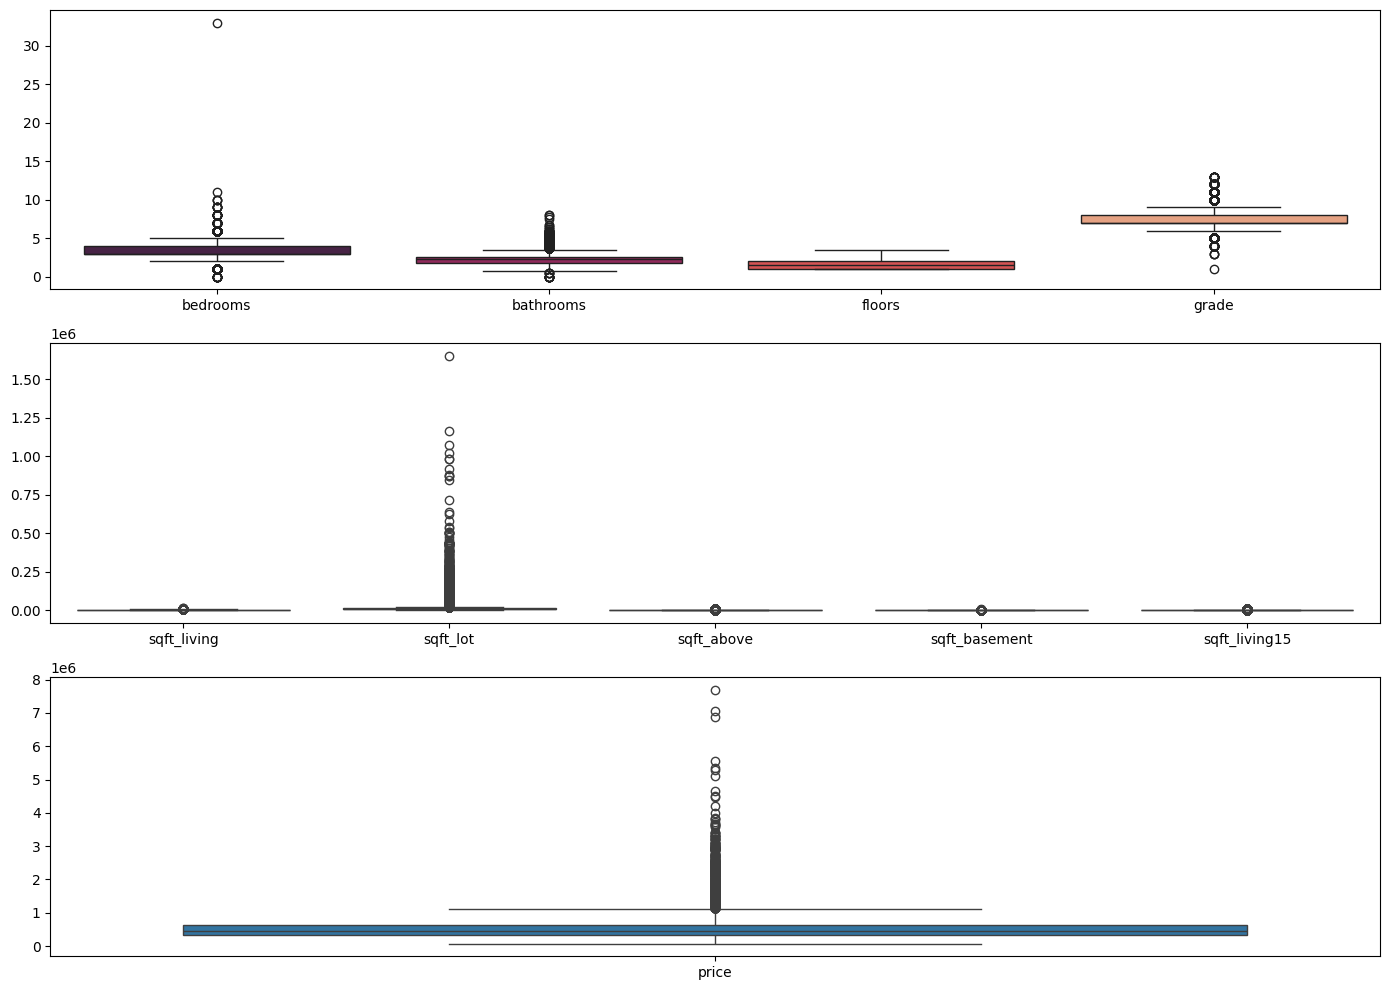

In [6]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
sns.boxplot(data = df[['bedrooms', 'bathrooms', 'floors', 'grade']], palette = 'rocket')
plt.subplot(3, 1, 2)
sns.boxplot(data = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15']])
plt.subplot(3, 1, 3)
sns.boxplot(data = df[['price']])

plt.tight_layout()
plt.show()


In [7]:
Remove_Outliers = df[(df['bedrooms'] <= 15) & (df['sqft_lot'] < 1500000)]
Remove_Outliers.shape

(21611, 21)

In [8]:
df = Remove_Outliers
df.shape

(21611, 21)

In [9]:
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])


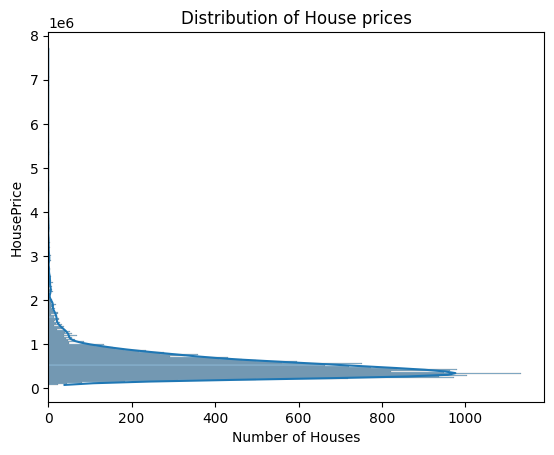

In [10]:
sns.histplot(data = df, y='price', kde=True)
plt.xlabel('Number of Houses')
plt.ylabel('HousePrice')
plt.title('Distribution of House prices')
plt.show()

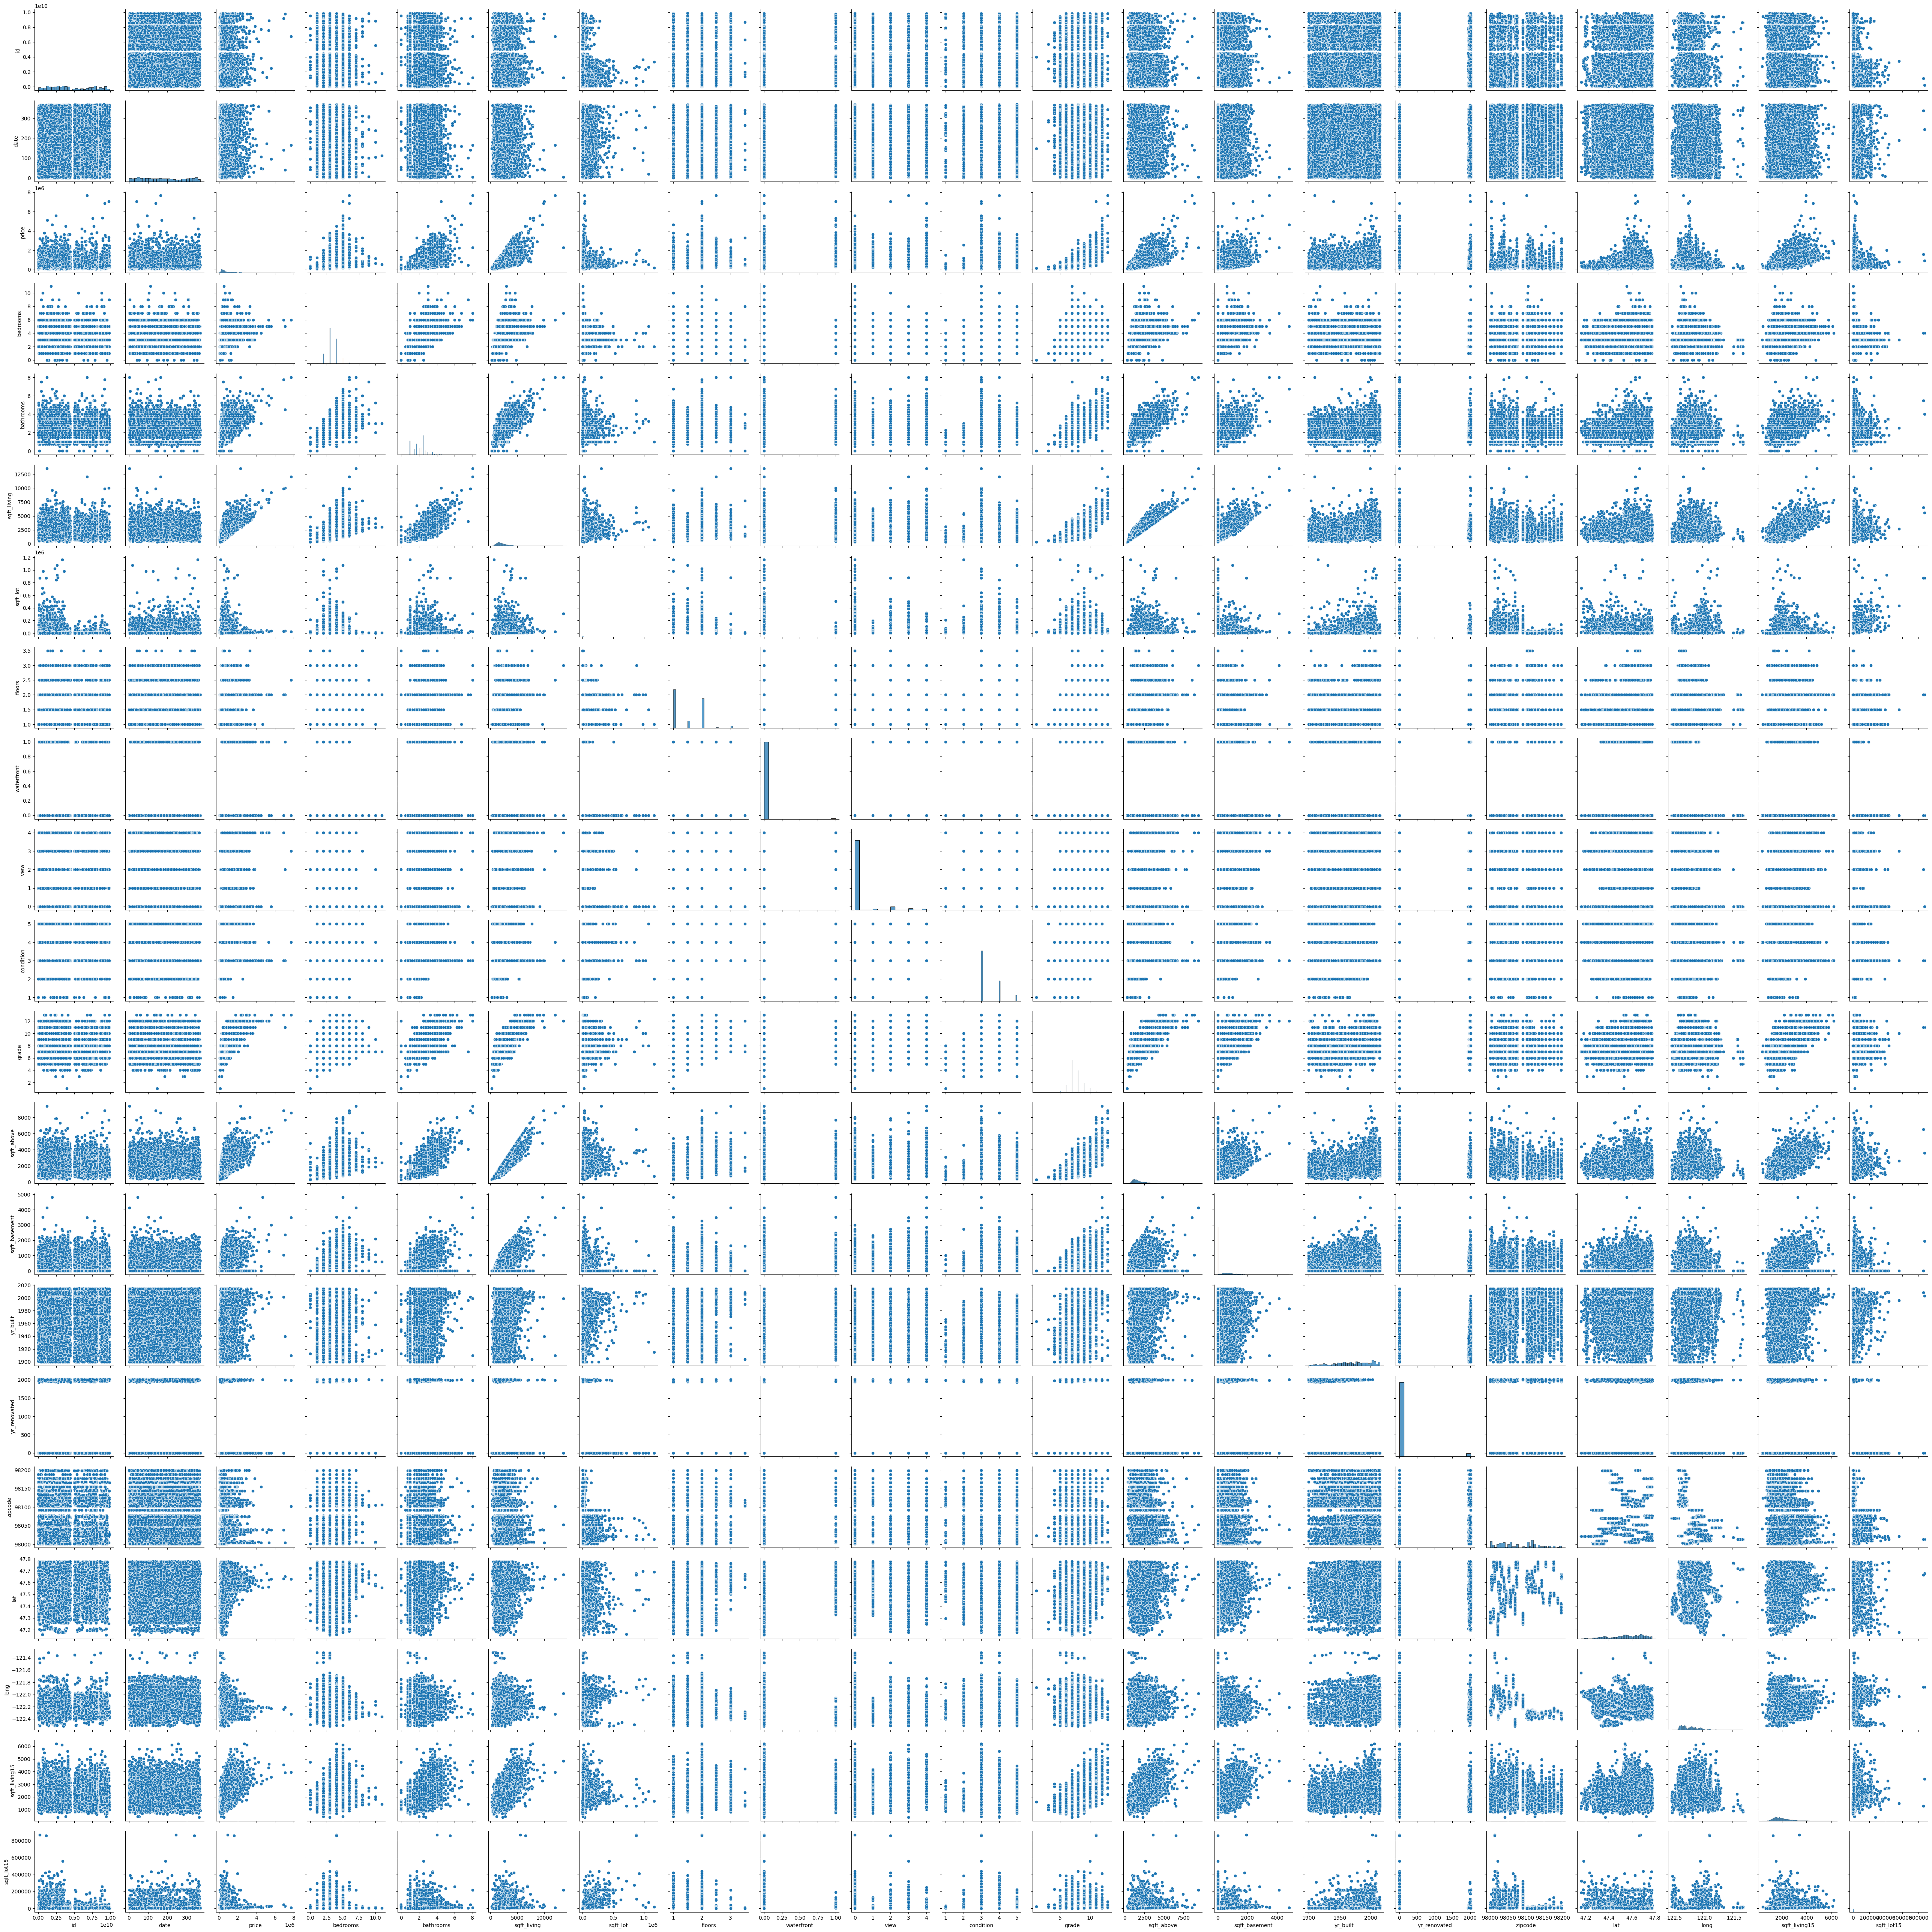

In [11]:
sns.pairplot(df)

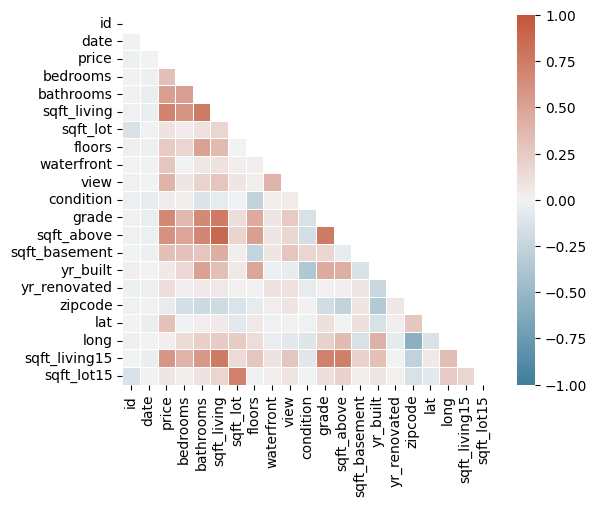

In [12]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": 1})
plt.show()

In [13]:
scaler = StandardScaler()
df[feature_variables.columns] = scaler.fit_transform(df[feature_variables.columns])

In [14]:
X = feature_variables
y = target_variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 45164817780.897964
R-squared: 0.7012448735876677


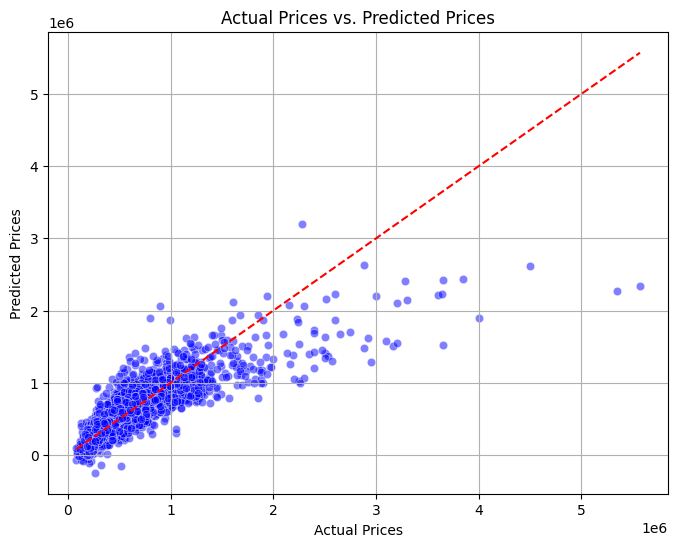

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r')  # Diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.grid(True)
plt.show()

In [19]:
lm = sm.OLS(y_train,X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2361.
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:49:17   Log-Likelihood:            -2.3543e+05
No. Observations:               17290   AIC:                         4.709e+05
Df Residuals:                   17272   BIC:                         4.710e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
id            -1.307e-06   5.32e-07     -2.456      0.014   -2.35e-06   -2.64e-07
bedrooms      -3.405e+04   2079.721    -16.371      0.000   -3.81e+04      -3e+04
bathrooms       4.45e+04   3607.657     12.334      0.000    3.74e+04    5.16e+04
sqft_living     108.7783      2.530     43.002      0.000     103.820     113.737
sqft_lot          0.0865      0.058      1.495      0.135      -0.027       0.200
floors         5528.2263   3896.712      1.419      0.156   -2109.725    1.32e+04
waterfront     5.625e+05   1.95e+04     28.831      0.000    5.24e+05    6.01e+05
view           5.326e+04   2346.748     22.694      0.000    4.87e+04    5.79e+04
condition      2.521e+04   2560.508      9.848      0.000    2.02e+04    3.02e+04
grade          9.426e+04   2363.737     39.876      0.000    8.96e+04    9.89e+04
sqft_above       70.5935      2.468     28.600      0.000      65.755      75.432
sqft_basement    38.1848      2.915     13.101      0.000      32.472      43.898
yr_built      -2622.2225     75.143    -34.896      0.000   -2769.510   -2474.934
yr_renovated     20.8861      4.051      5.156      0.000      12.946      28.826
zipcode        -486.9280     19.824    -24.562      0.000    -525.785    -448.071
lat            5.949e+05   1.19e+04     50.135      0.000    5.72e+05    6.18e+05
long           -1.96e+05   1.45e+04    -13.488      0.000   -2.25e+05   -1.68e+05
sqft_living15    22.6219      3.747      6.038      0.000      15.278      29.966
sqft_lot15       -0.3330      0.082     -4.064      0.000      -0.494      -0.172
==============================================================================
Omnibus:                    15013.753   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1728730.089
Skew:                           3.646   Prob(JB):                         0.00
Kurtosis:                      51.440   Cond. No.                     1.18e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.64e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""